In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf

In [3]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [4]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [5]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-10-04,3.368624,3.408972,3.338237,3.363891,3.355650,261693228
2004-10-05,3.353929,3.450317,3.293655,3.446332,3.437889,300887589
2004-10-06,3.425909,3.448325,3.387304,3.414203,3.405839,268900140
2004-10-07,3.410218,3.483941,3.401002,3.458287,3.449815,283643194
2004-10-08,3.455050,3.478960,3.412708,3.430392,3.421988,222442656


In [6]:
google_data.shape

(5033, 6)

In [7]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5033.000000,5033.000000,5033.000000,5033.000000,5033.000000,5.033000e+03
mean,46.544385,47.034459,46.078987,46.564138,46.453828,1.141742e+08
std,44.525283,45.014951,44.088092,44.553996,44.455266,1.490110e+08
min,3.348449,3.408972,3.293655,3.363891,3.355650,1.584340e+05
25%,13.154693,13.280222,13.013223,13.142987,13.110789,2.699792e+07
50%,27.424706,27.659561,27.128019,27.427942,27.360750,5.339539e+07
75%,61.400501,62.028000,60.826500,61.457500,61.306942,1.393002e+08
max,191.750000,193.309998,190.619995,192.660004,192.406723,1.650833e+09


In [8]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5033 entries, 2004-10-04 to 2024-10-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5033 non-null   float64
 1   High       5033 non-null   float64
 2   Low        5033 non-null   float64
 3   Close      5033 non-null   float64
 4   Adj Close  5033 non-null   float64
 5   Volume     5033 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.2 KB


In [9]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

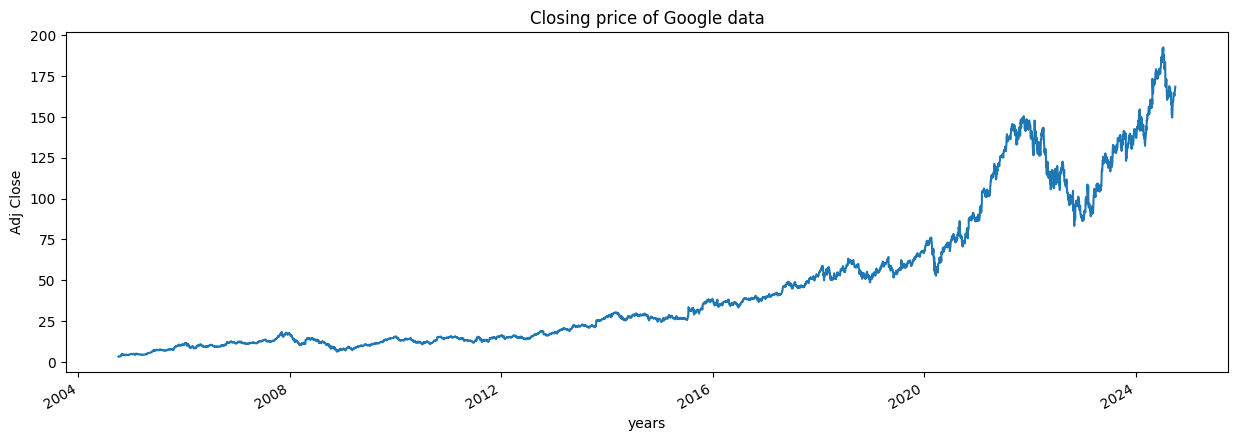

In [12]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [13]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")

In [14]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

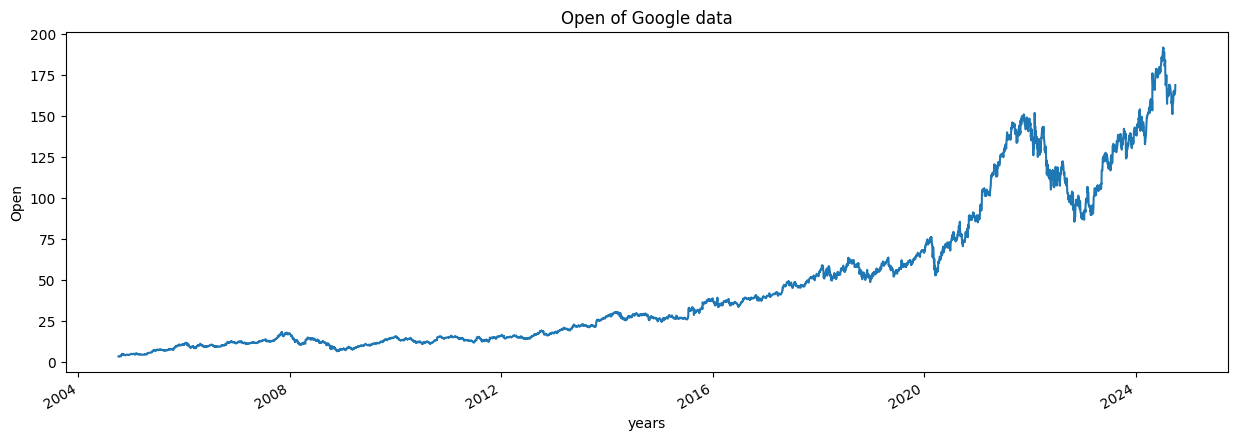

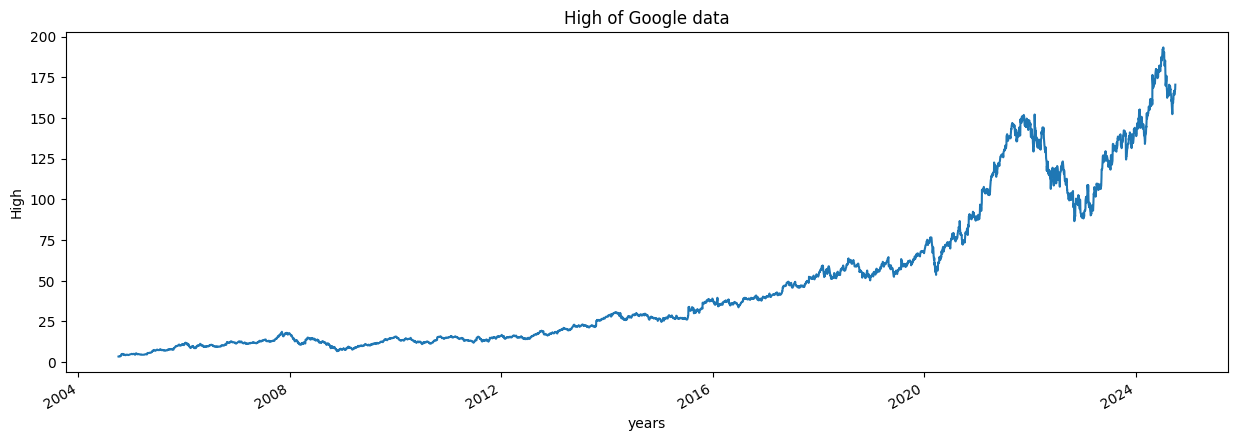

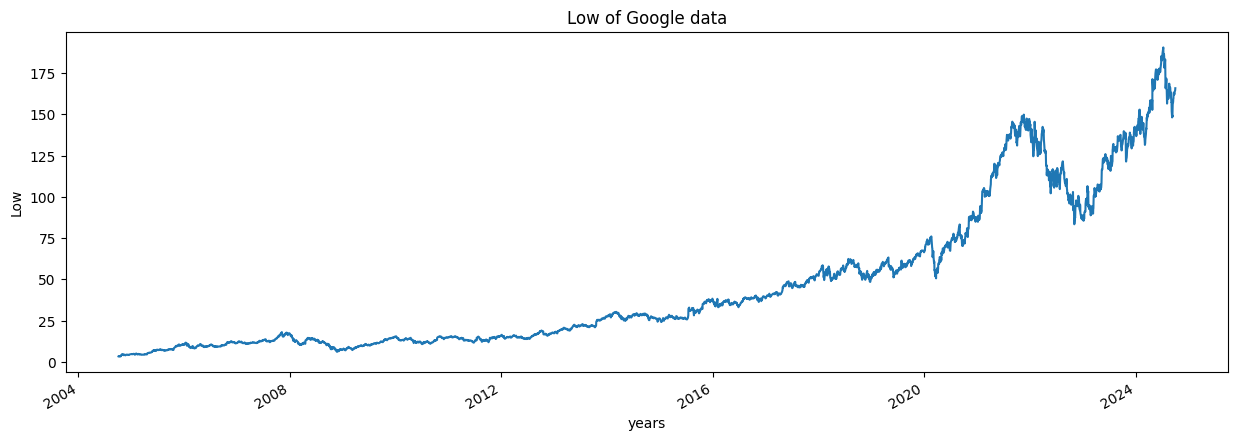

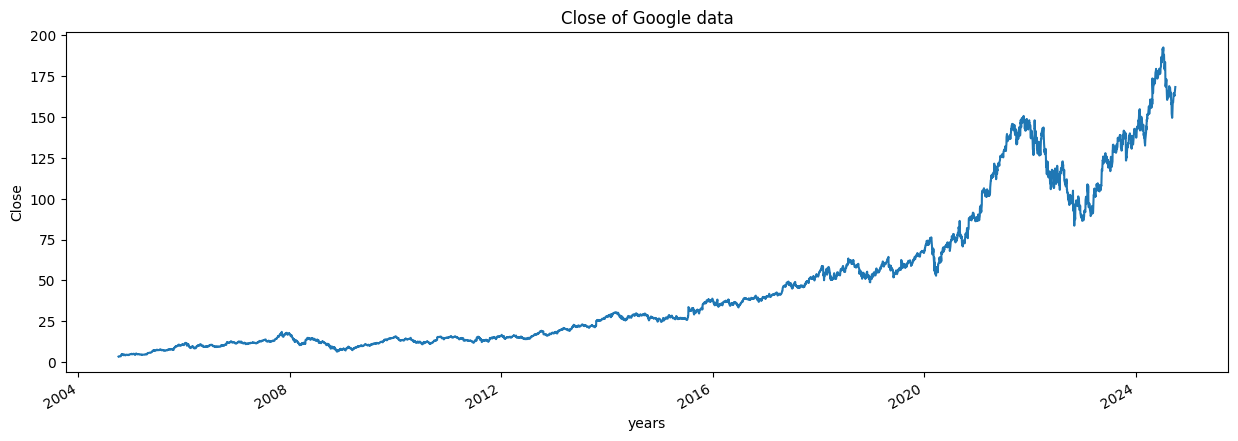

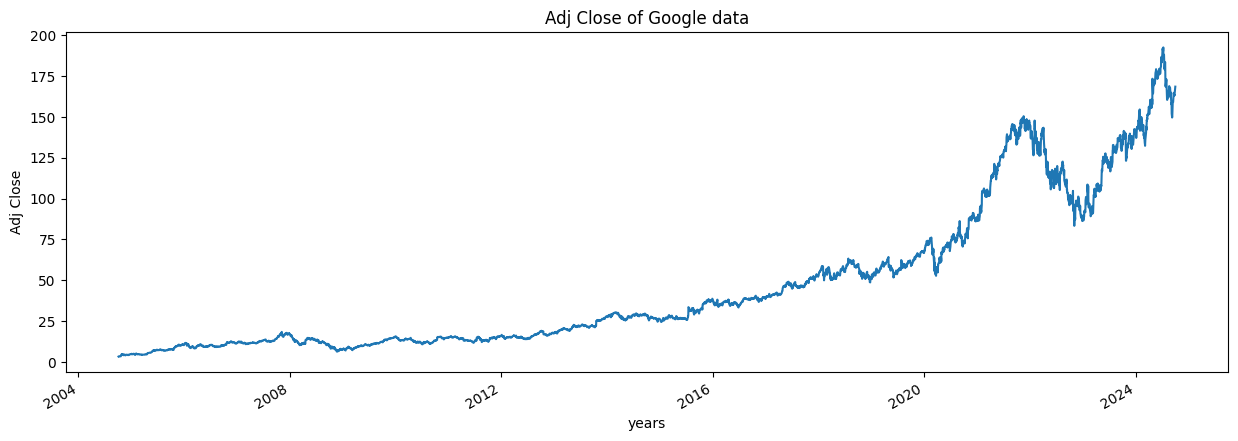

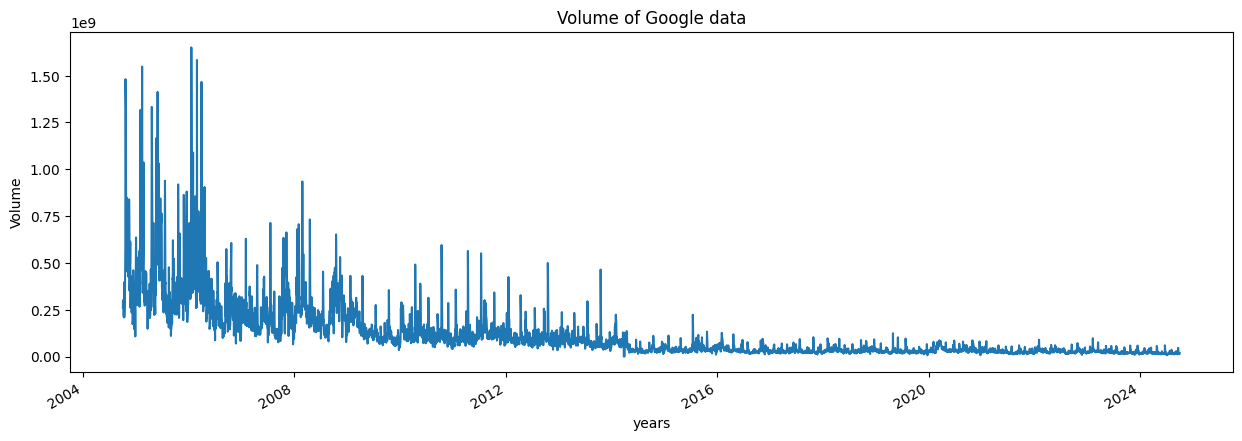

In [15]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [16]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null 30 40 50 60 70 80

In [17]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [18]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [19]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [20]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 63
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 189


In [21]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [22]:
google_data['MA_for_250_days'][0:250].tail()

Date
2005-09-22        NaN
2005-09-23        NaN
2005-09-26        NaN
2005-09-27        NaN
2005-09-28    5.58819
Name: MA_for_250_days, dtype: float64

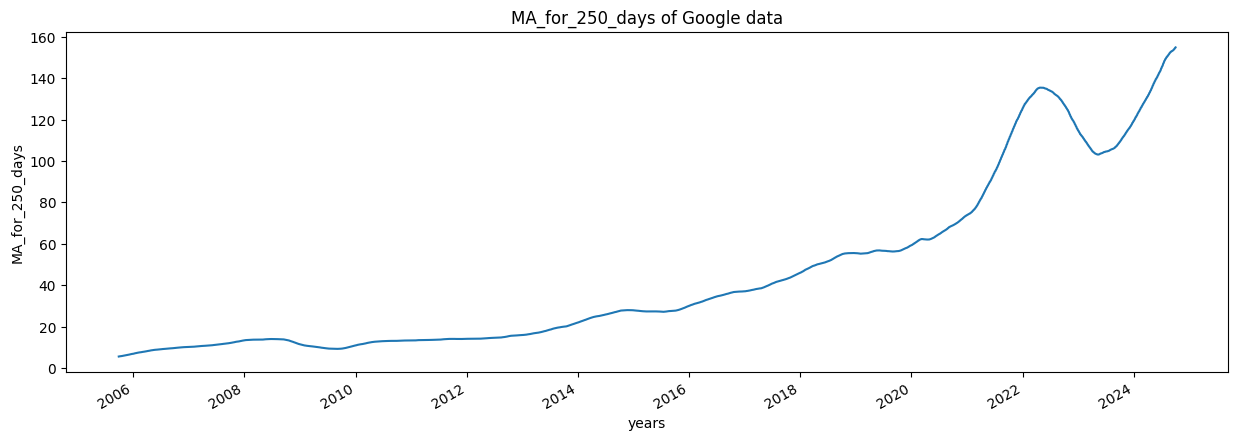

In [23]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

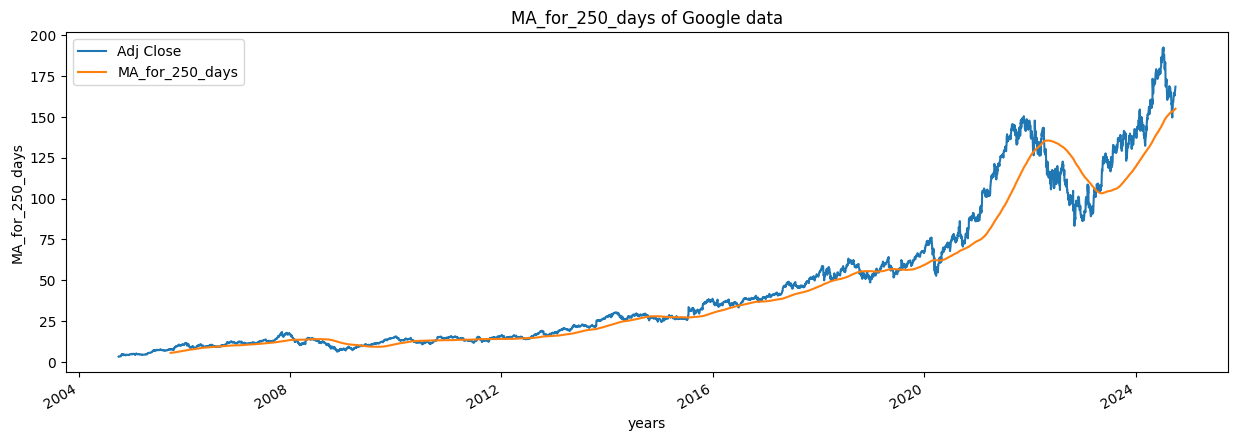

In [24]:

plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

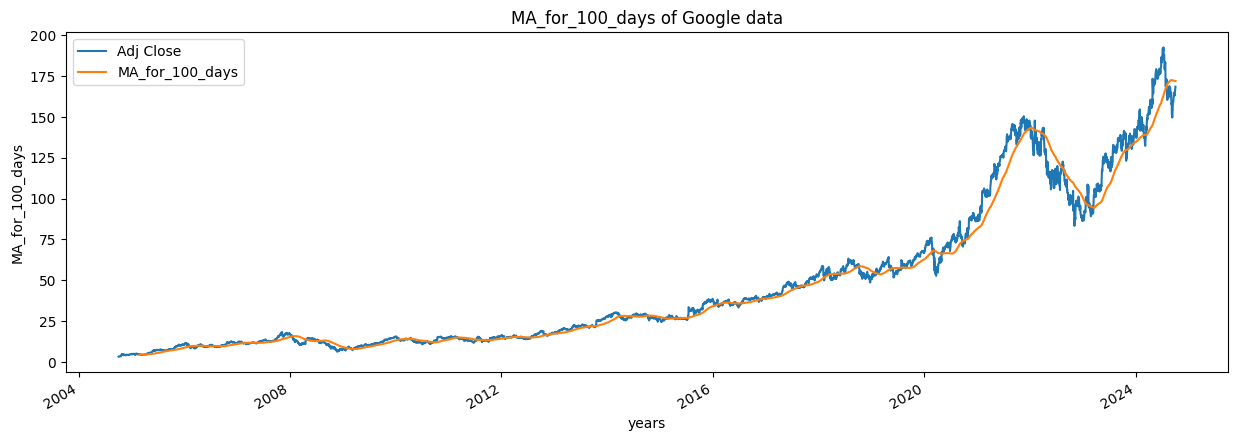

In [25]:

google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

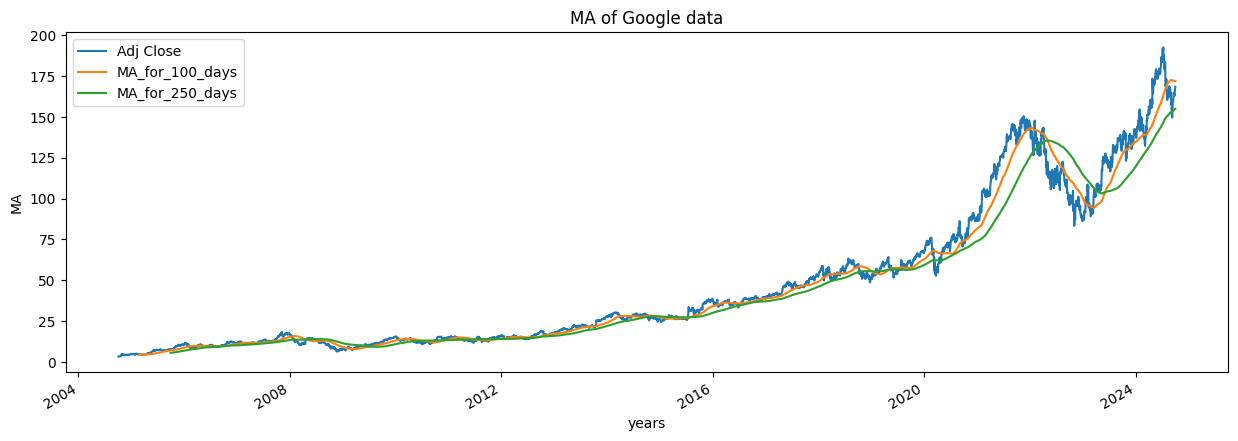

In [26]:
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [27]:

google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-10-04,3.355650,NaN
2004-10-05,3.437889,0.024508
2004-10-06,3.405839,-0.009323
2004-10-07,3.449815,0.012912
2004-10-08,3.421988,-0.008066


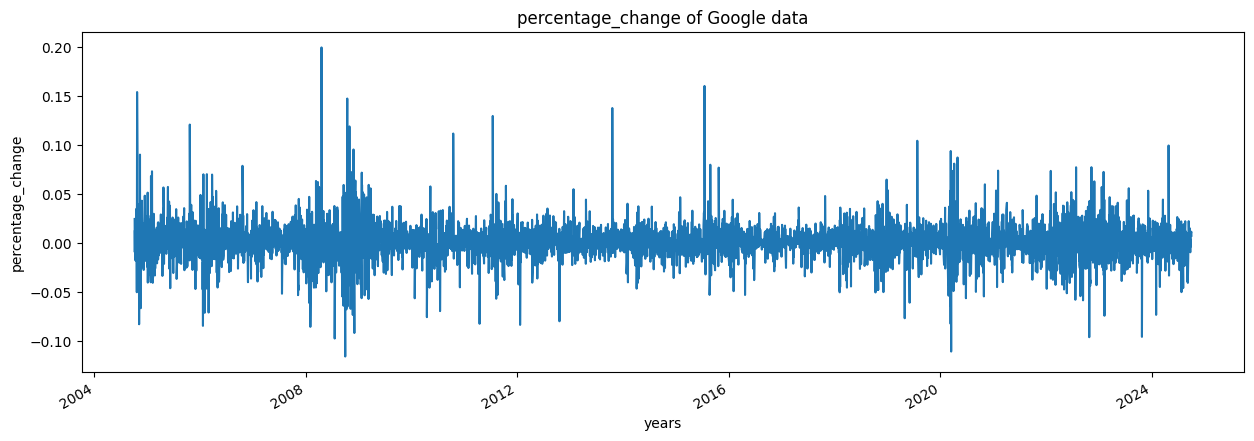

In [28]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [29]:
Adj_close_price = google_data[['Adj Close']]

In [30]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([192.40672302]), array([3.35565019]))

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.00000000e+00],
       [4.35010232e-04],
       [2.65476099e-04],
       ...,
       [8.56564000e-01],
       [8.66614242e-01],
       [8.73120398e-01]])

In [33]:
len(scaled_data)

5033

In [34]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [35]:
x_data[0],y_data[0]


(array([[0.00000000e+00],
        [4.35010232e-04],
        [2.65476099e-04],
        [4.98092113e-04],
        [3.50900216e-04],
        [2.62870598e-05],
        [3.07532368e-04],
        [7.67509254e-04],
        [9.12074210e-04],
        [1.18937596e-03],
        [1.85306242e-03],
        [1.69272825e-03],
        [7.13626078e-04],
        [1.88197390e-03],
        [4.91127505e-03],
        [6.87867054e-03],
        [6.14270349e-03],
        [6.69073900e-03],
        [7.65406818e-03],
        [7.30448207e-03],
        [8.01284796e-03],
        [7.86040218e-03],
        [7.43984454e-03],
        [6.52383055e-03],
        [4.50648661e-03],
        [4.92703921e-03],
        [4.42106754e-03],
        [4.31067047e-03],
        [6.30304144e-03],
        [6.16898803e-03],
        [6.54617278e-03],
        [4.92572764e-03],
        [4.92046871e-03],
        [4.26861672e-03],
        [4.51305964e-03],
        [3.94794334e-03],
        [4.26598600e-03],
        [5.21748575e-03],
        [5.8

In [36]:
int(len(x_data)*0.7)

3453

In [37]:
4908-100-int(len(x_data)*0.7)

1355

In [38]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [39]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3453, 100, 1)
(3453, 1)
(1480, 100, 1)
(1480, 1)


In [40]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [41]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

c:\Users\toryy\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [43]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 61s 17ms/step - loss: 2.2843e-04
Epoch 2/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 73s 21ms/step - loss: 6.0308e-05


In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [45]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


In [46]:
predictions

array([[0.25786644],
       [0.2524923 ],
       [0.24888115],
       ...,
       [0.7897491 ],
       [0.7951947 ],
       [0.80356157]], dtype=float32)

In [47]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 52.10558 ],
       [ 51.089592],
       [ 50.406902],
       ...,
       [152.65857 ],
       [153.68806 ],
       [155.26982 ]], dtype=float32)

In [48]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 51.80427551],
       [ 51.67559433],
       [ 52.05516052],
       ...,
       [165.28999329],
       [167.19000244],
       [168.41999817]])

In [49]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [50]:
rmse

6.329131605492345

In [51]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2018-11-12,51.804276,52.105579
2018-11-13,51.675594,51.089592
2018-11-14,52.055161,50.406902
2018-11-15,53.105083,50.361885
2018-11-16,52.944477,51.024315


<Figure size 640x480 with 0 Axes>

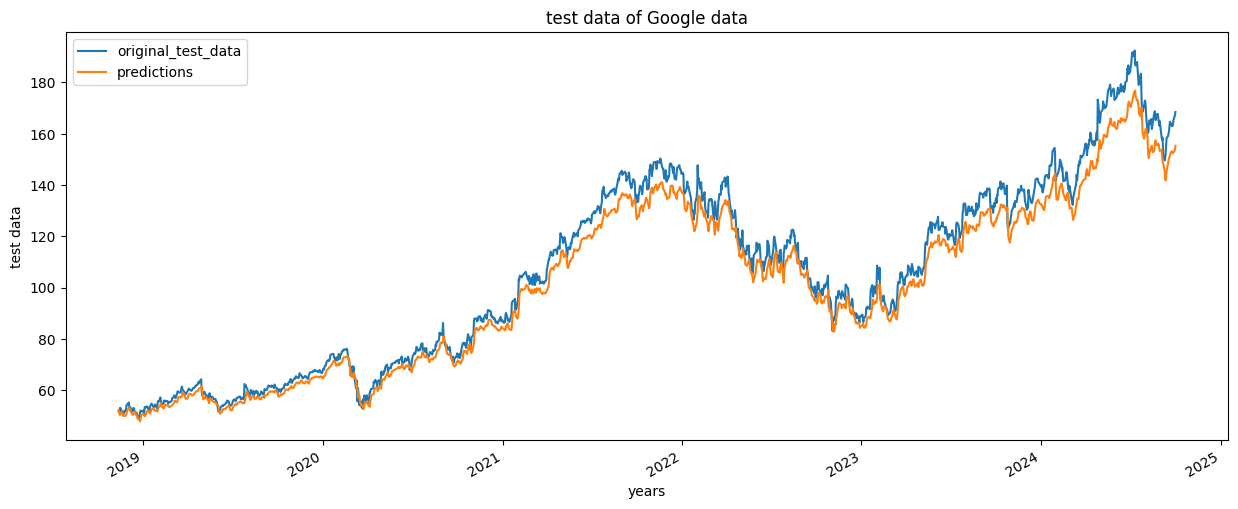

In [52]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

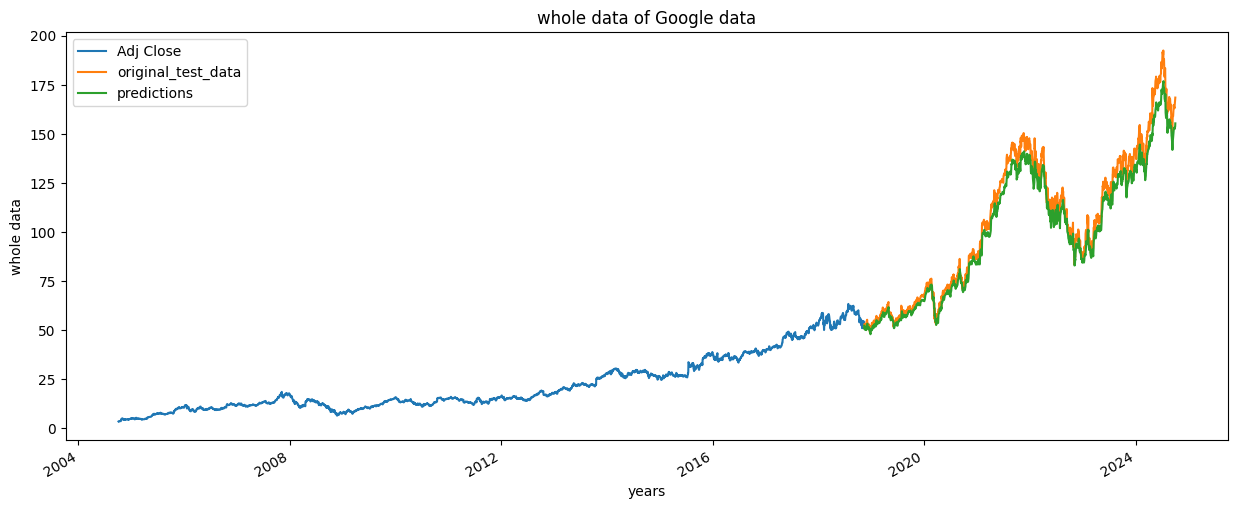

In [53]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [54]:
model.save("Latest_stock_price_model.keras")